In [27]:
! pip install yfinance

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as y
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:


def downlaod_stocks_data(ticker, start, end):
    df = y.download(ticker, start=start, end = end)

    
    
    return df


df = downlaod_stocks_data('AAPL', '2000-01-01', '2025-12-31')


[*********************100%***********************]  1 of 1 completed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6538 entries, 2000-01-03 to 2025-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6538 non-null   float64
 1   (High, AAPL)    6538 non-null   float64
 2   (Low, AAPL)     6538 non-null   float64
 3   (Open, AAPL)    6538 non-null   float64
 4   (Volume, AAPL)  6538 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 306.5 KB


In [4]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2000-01-03,0.839281,0.843498,0.762429,0.786328,535796800
2000-01-04,0.768521,0.829440,0.758680,0.811633,512377600
2000-01-05,0.779767,0.828971,0.772269,0.777892,778321600
2000-01-06,0.712287,0.802260,0.712287,0.795700,767972800
2000-01-07,0.746027,0.757274,0.716036,0.723534,460734400


In [5]:
def validate_data(data):
    validation_report={
        'total_rows': len(data),
        'total_cols': len(data.columns),
        'missing_values': data.isnull().sum().to_dict()
    }
    return validation_report

report = validate_data(df)
print(f'Data Validation report \n {report}')

Data Validation report 
 {'total_rows': 6538, 'total_cols': 5, 'missing_values': {('Close', 'AAPL'): 0, ('High', 'AAPL'): 0, ('Low', 'AAPL'): 0, ('Open', 'AAPL'): 0, ('Volume', 'AAPL'): 0}}


In [6]:
train = df[(df.index.year < 2024) & (df.index.year >= 2000)]
test = df[df.index.year >= 2024]

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2000-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6037 non-null   float64
 1   (High, AAPL)    6037 non-null   float64
 2   (Low, AAPL)     6037 non-null   float64
 3   (Open, AAPL)    6037 non-null   float64
 4   (Volume, AAPL)  6037 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 283.0 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2024-01-02 to 2025-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   501 non-null    float64
 1   (High, AAPL)    501 non-null    float64
 2   (Low, AAPL)     501 non-null    float64
 3   (Open, AAPL)    501 non-null    float64
 4   (Volume, AAPL)  501 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.5 KB


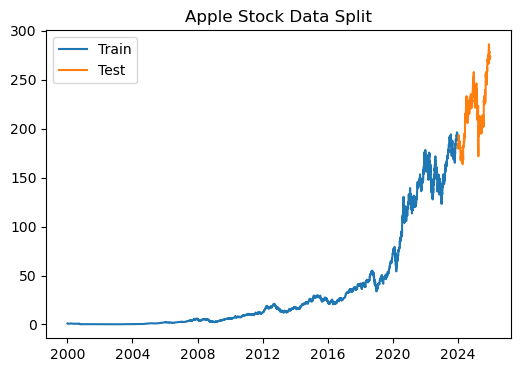

In [8]:
plt.figure(figsize=(6,4))
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label = 'Test')
plt.legend()
plt.title('Apple Stock Data Split')
plt.show()

In [9]:
# feature scaling:
# feature scaling:


scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(train['Close'].values.reshape(-1, 1))
training_set_scaled

array([[0.00327726],
       [0.00291635],
       [0.00297371],
       ...,
       [0.97493839],
       [0.97711102],
       [0.97180554]])

In [10]:
X_train = []
y_train = []

for i in range(80, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-80: i, 0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(5957, 80)
(5957,)


In [11]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(5957, 80, 1)


In [12]:
import tensorflow as tf


model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units= 128, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=32, ))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 1))

model.summary()


c:\Users\thedo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 80, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 80, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 80, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,417 (501.63 KB)

 Trainable params: 128,417 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss=['mse'], metrics=['mae', 'mse', 'mape'])

In [14]:

early_stopping=tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience= 5,
        restore_best_weights=True
    )
lr_reduce= tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr = 1e-7
    )

In [16]:
model.fit(X_train, y_train, epochs=100, batch_size=24, callbacks=[early_stopping, lr_reduce], validation_split=0.1)

Epoch 1/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 26s 116ms/step - loss: 4.3468e-04 - mae: 0.0121 - mape: 6004.1221 - mse: 4.3468e-04 - val_loss: 9.7517e-04 - val_mae: 0.0244 - val_mape: 3.1261 - val_mse: 9.7517e-04 - learning_rate: 0.0010
Epoch 2/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 27s 119ms/step - loss: 3.4962e-04 - mae: 0.0108 - mape: 3415.5752 - mse: 3.4962e-04 - val_loss: 8.3091e-04 - val_mae: 0.0231 - val_mape: 2.9252 - val_mse: 8.3091e-04 - learning_rate: 0.0010
Epoch 3/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - loss: 3.6859e-04 - mae: 0.0114 - mape: 2462.0776 - mse: 3.6859e-04 - val_loss: 0.0015 - val_mae: 0.0306 - val_mape: 3.9263 - val_mse: 0.0015 - learning_rate: 0.0010
Epoch 4/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - loss: 3.7722e-04 - mae: 0.0114 - mape: 1584.2487 - mse: 3.7722e-04 - val_loss: 8.1579e-04 - val_mae: 0.0229 - val_mape: 2.9064 - val_mse: 8.1579e-04 - learning_rate: 0.0010
Epoch 5/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - loss: 3.6717e-04 - mae: 0.01

In [ ]:
# testing the model on un-seen data.

dataset_test = test['Close'].values.reshape(-1,1)
scaled_dataset_test = scaler.transform(dataset_test)

# create X_test
window_size = 80 # same as the size of training

X_test = []

inputs = df['Close'][len(df) - len(test)  - window_size:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

for i in range(window_size, len(inputs)):
    X_test.append(inputs[i-window_size: i, 0])

X_test  = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f'Shape of X_test: {X_test.shape}')



Shape of X_test: (501, 80, 1)


In [39]:
# Prediction:
predicted_stocks_values_scaled = model.predict(X_test)

predicted_stocks_values = scaler.inverse_transform(predicted_stocks_values_scaled)

actual_values = test['Close'].values
print(predicted_stocks_values)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
[[355.6146 ]
 [355.62466]
 [355.62155]
 [355.623  ]
 [355.62134]
 [355.6157 ]
 [355.6214 ]
 [355.62204]
 [355.62622]
 [355.62817]
 [355.6345 ]
 [355.63632]
 [355.63123]
 [355.63763]
 [355.6446 ]
 [355.6537 ]
 [355.66412]
 [355.6719 ]
 [355.68057]
 [355.68585]
 [355.694  ]
 [355.6975 ]
 [355.69226]
 [355.69623]
 [355.69434]
 [355.69595]
 [355.69998]
 [355.70493]
 [355.70682]
 [355.71335]
 [355.71802]
 [355.72055]
 [355.7232 ]
 [355.72778]
 [355.7305 ]
 [355.7329 ]
 [355.73602]
 [355.74472]
 [355.74847]
 [355.74832]
 [355.75272]
 [355.75327]
 [355.75415]
 [355.7568 ]
 [355.75363]
 [355.74277]
 [355.7335 ]
 [355.72318]
 [355.7159 ]
 [355.71182]
 [355.70944]
 [355.6997 ]
 [355.69653]
 [355.68967]
 [355.68362]
 [355.67963]
 [355.68756]
 [355.6748 ]
 [355.67148]
 [355.6643 ]
 [355.6523 ]
 [355.652  ]
 [355.64566]
 [355.63843]
 [355.62836]
 [355.62207]
 [355.6124 ]
 [355.60672]
 [355.5961 ]
 [355.5914 ]
 [355.57343]
 [355.5738 ]
 [355.57617]
 [355.57178

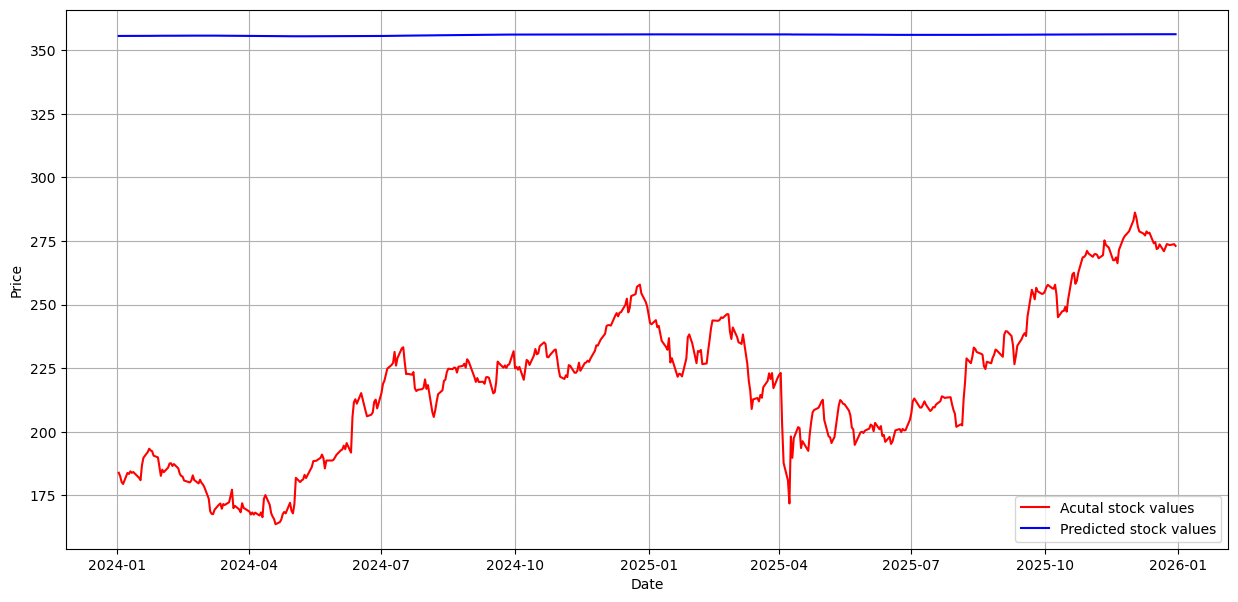

In [38]:
# Graphical representation of actual and predicted values


plt.figure(figsize=(15,7))
plt.plot(test.index, actual_values, color='Red', label='Acutal stock values')
plt.plot(test.index, predicted_stocks_values, color='blue', label='Predicted stock values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()